In [17]:
import os
import json
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers.legacy import Adam
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# One hot encoding target classes

In [23]:
def proccess_data(res_dir, res):
    no_path = f'/Users/james/MScCode/Final Project/Datasets_cleaned/Resolutions/{res_dir}/no'
    yes_path = f'/Users/james/MScCode/Final Project/Datasets_cleaned/Resolutions/{res_dir}/yes'

    if len(os.listdir(no_path)) == 0 and len(os.listdir(yes_path)) == 0:
        raise Exception('No files present. Please pre-process data.')

    data = []
    result = []
    encoder = OneHotEncoder()
    encoder.fit([[0], [1]]) 

    # No tumour
    for file in os.listdir(no_path):
        img = Image.open(f'{no_path}/{file}')
        img = np.array(img)
        if img.shape == res:
            data.append(np.array(img))
            result.append(encoder.transform([[0]]).toarray())

    # Yes tumour
    for file in os.listdir(yes_path):
        img = Image.open(f'{yes_path}/{file}')
        img = np.array(img)
        if img.shape == res:
            data.append(np.array(img))
            result.append(encoder.transform([[1]]).toarray())

    data = np.array(data)
    results = np.array(result)
    results = results.reshape(data.shape[0], 2)

    X_train, X_test, y_train, y_test = train_test_split(data, results, test_size=0.3, shuffle=True, random_state=0)

    return X_train, X_test, y_train, y_test



In [31]:
def compile_model(res_dir, res):
    X_train, X_test, y_train, y_test = proccess_data(res_dir, res)

    model = Sequential()

    # res need to be in form of (x, y, z) e.g (128, 128, 3)
    model.add(Conv2D(32, kernel_size=(2, 2), input_shape=res, padding = 'Same'))
    model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))

    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
    model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=40, verbose=0,validation_data=(X_test, y_test))
    score = model.evaluate(X_test, y_test, verbose=0)
    pred = model.predict(X_test)
    y_pred = np.argmax(pred, axis=1)
    y_test_int = np.argmax(y_test, axis=1)
    # Converting y_test labels back from one-hot encoded labels to 0-9 integers for classification
    
    # Comparing predicted and actual labels
    # print(classification_report(y_test_int, y_pred))
    # print(f'Accuracy score: {accuracy_score(y_test_int, y_pred)}')
    confusion = confusion_matrix(y_test_int, y_pred)

    # Save results
    save_dict = {
        'resolution': res_dir,
        'test_loss': score[0],
        'test_accuracy': score[1],
        'training_loss': history.history['loss'],
        'val_loss': history.history['val_loss'],
        'true_neg': confusion[0][0],
        'false_neg': confusion[1][0],
        'true_pos': confusion[1][1],
        'false_pos': confusion[0][1]
    }

    print(save_dict)

    # print(save_dict)

    # # If file not exists, create new file
    # if os.path.exists("res_testing.json") == False:
    #     with open("testing.json", "w") as outfile:
    #         json.dump(save_dict, outfile)
    #         print('New file created.')
    # else:
    #     # Open json file, append new contents
    #     with open("res_testing.json", "r") as infile:
    #         data = json.load(infile)
    #         data.extend(save_dict)
            
    #     # Save extended results
    #     with open("res_testing.json", "w") as outfile:
    #         json.dump(data, outfile)
    #         print(f'Resolution data updated.')

    # print(f'Res {res_dir} complete:')

In [33]:
compile_model('32', (32, 32, 3))

2023-01-18 10:09:54.613754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-18 10:09:55.141705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 17ms/step
{'resolution': '32', 'test_loss': 0.9935747981071472, 'test_accuracy': 0.7878788113594055, 'training_loss': [3.8462026119232178, 1.7971420288085938, 1.1344469785690308, 1.1597604751586914, 0.7440781593322754, 0.6362918615341187, 0.6083597540855408, 0.6588245034217834, 0.3467061221599579, 0.5033069849014282, 0.3125380575656891, 0.2829466164112091, 0.24312271177768707, 0.16805395483970642, 0.14112649857997894, 0.17498594522476196, 0.11142446845769882, 0.2000667154788971, 0.12321639806032181, 0.10095418244600296, 0.07063445448875427, 0.05524693429470062, 0.05738430097699165, 0.04803938791155815, 0.08868972957134247, 0.06661966443061829, 0.10021723806858063, 0.05780122056603432, 0.07093815505504608, 0.060180917382240295, 0.03716810420155525, 0.057100068777799606, 0.02776132896542549, 0.06388915330171585, 0.025641731917858124, 0.053977373987436295, 0.02077164314687252, 0.022265851497650146, 0.022627731785178185, 0.02786783128976822, 0.0548

2023-01-18 10:10:00.313424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [3]:
no_path = r'/Users/james/MScCode/Final Project/Datasets_cleaned/test_dataset_processed/no'
yes_path = r'/Users/james/MScCode/Final Project/Datasets_cleaned/test_dataset_processed/yes'

In [14]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'/Users/james/MScCode/Final Project/Datasets/brain_tumour_small/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [15]:
paths = []
for r, d, f in os.walk(r"/Users/james/MScCode/Final Project/Datasets/brain_tumour_small/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [16]:
data = np.array(data)
results = np.array(result)
results = results.reshape(data.shape[0], 2)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, results, test_size=0.5, shuffle=True, random_state=0)

In [20]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer=Adam())
history = model.fit(X_train, y_train, epochs = 50, batch_size = 40, verbose = 1,validation_data = (X_test, y_test))

Epoch 1/50


2023-01-13 17:17:57.198993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step - loss: 49.6457 - val_loss: 253.4489
Epoch 2/50


2023-01-13 17:17:59.941755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 152ms/step - loss: 22.3490 - val_loss: 129.3192
Epoch 3/50
2/2 [==============================] - 0s 145ms/step - loss: 16.5771 - val_loss: 184.9316
Epoch 4/50
2/2 [==============================] - 0s 143ms/step - loss: 9.2043 - val_loss: 36.3381
Epoch 5/50
2/2 [==============================] - 0s 144ms/step - loss: 0.8067 - val_loss: 41.9377
Epoch 6/50
2/2 [==============================] - 0s 159ms/step - loss: 2.0016 - val_loss: 74.8410
Epoch 7/50
2/2 [==============================] - 0s 156ms/step - loss: 3.2943 - val_loss: 74.0615
Epoch 8/50
2/2 [==============================] - 0s 150ms/step - loss: 1.8755 - val_loss: 58.3498
Epoch 9/50
2/2 [==============================] - 0s 142ms/step - loss: 0.9669 - val_loss: 39.5923
Epoch 10/50
2/2 [==============================] - 0s 142ms/step - loss: 1.8169 - val_loss: 28.9222
Epoch 11/50
2/2 [==============================] - 0s 155ms/step - loss: 0.6740 - val_loss: 29.3429
Epoch 12/50
2/2

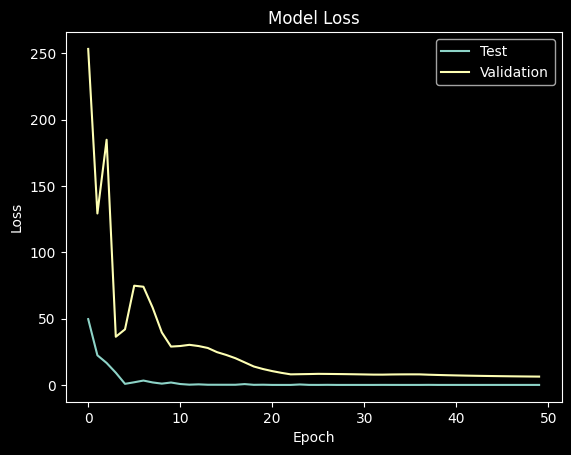

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()